# Big Data Real-Time Analytics with Python and Spark

## Chapter 13 -  Apache Spark SQL - Part 2

### Mini project 4 - Data science applied to logistics with Spark SQL

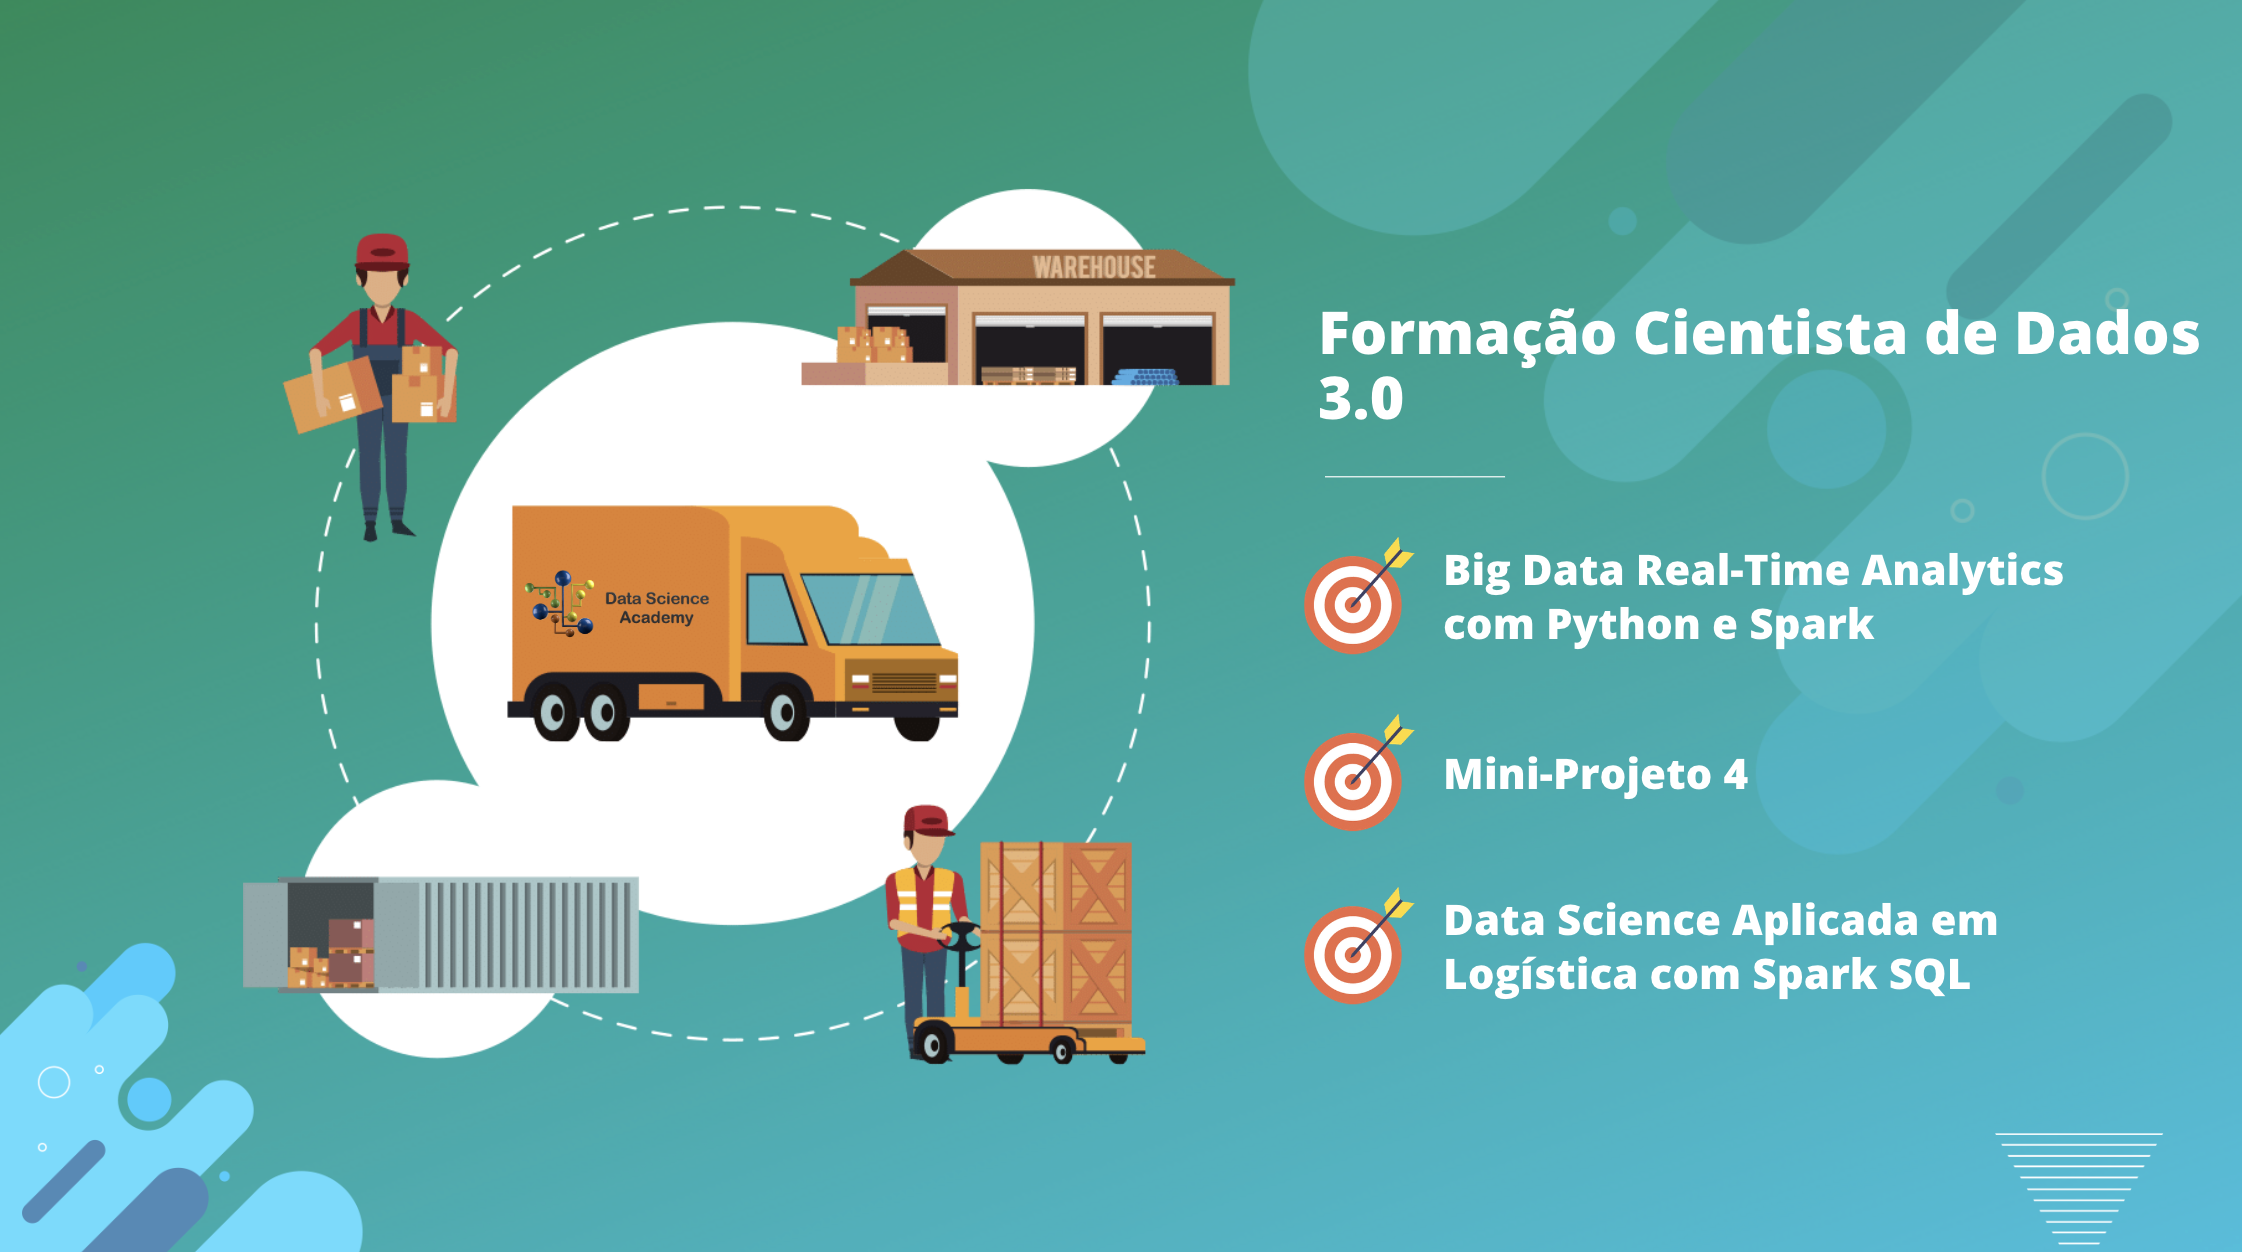

In [2]:
# Python version
from platform import python_version
print('The version used in this notebook is: ', python_version())

The version used in this notebook is:  3.8.13


In [3]:
# Import findspark and inicialize it
import findspark
findspark.init()

In [4]:
# Imports
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import Window
from pyspark.sql.functions import col
from pyspark.sql.functions import row_number
from pyspark.sql.functions import lead
from pyspark.sql.functions import min, max
from pyspark.sql.functions import unix_timestamp

In [5]:
%reload_ext watermark
%watermark -a 'Bianca Amorim' --iversions

Author: Bianca Amorim

findspark: 2.0.1
pyspark  : 3.3.1



## Preparing Spark Environment

In [6]:
# Create Spark Context
sc = SparkContext(appName = 'Mini_project4')

22/12/03 12:15:21 WARN Utils: Your hostname, Avell resolves to a loopback address: 127.0.1.1; using 192.168.1.80 instead (on interface wlo1)
22/12/03 12:15:21 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/12/03 12:15:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/12/03 12:15:29 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [7]:
# Create session
spark = SparkSession.builder.getOrCreate()

In [8]:
spark

## Loading Dataset with Spark Dataframe

In [9]:
# Name of file
file = 'datasets/dataset.txt'

In [11]:
# Loading Spark dataframe directly
# We will not use pandas because we will not do exploratory analysis.
df = spark.read.csv(file, header = True)  

In [12]:
type(df)

pyspark.sql.dataframe.DataFrame

In [13]:
df.show(5)

+----------+---------+-------+
|id_veiculo|  entrega|horario|
+----------+---------+-------+
|       298|Entrega 1|  7:58a|
|       298|Entrega 2|  8:04a|
|       298|Entrega 3|  8:17a|
|       298|Entrega 4|  8:28a|
|       298|Entrega 5|  8:33a|
+----------+---------+-------+
only showing top 5 rows



## Creating a Temporary Table

Creating a temporary table to execute queries SQL. The temporary table exist only in this session.

In [14]:
# Create table temporary
df.createOrReplaceTempView('tb_logistic')

## Running SQL Queries

In [15]:
# Verify the table columns
spark.sql('SHOW COLUMNS FROM tb_logistic').show()

+----------+
|  col_name|
+----------+
|id_veiculo|
|   entrega|
|   horario|
+----------+



In [17]:
# Visualize the first 5 register
spark.sql('SELECT * FROM tb_logistic LIMIT 5').show()

+----------+---------+-------+
|id_veiculo|  entrega|horario|
+----------+---------+-------+
|       298|Entrega 1|  7:58a|
|       298|Entrega 2|  8:04a|
|       298|Entrega 3|  8:17a|
|       298|Entrega 4|  8:28a|
|       298|Entrega 5|  8:33a|
+----------+---------+-------+



In [18]:
# Describe table
spark.sql('DESCRIBE tb_logistic').show()

+----------+---------+-------+
|  col_name|data_type|comment|
+----------+---------+-------+
|id_veiculo|   string|   null|
|   entrega|   string|   null|
|   horario|   string|   null|
+----------+---------+-------+



## Queries SQL x Dot Notation in Spark SQL

In [19]:
# Query SQL
spark.sql('SELECT id_veiculo AS veiculo, entrega FROM tb_logistic LIMIT 5').show()

+-------+---------+
|veiculo|  entrega|
+-------+---------+
|    298|Entrega 1|
|    298|Entrega 2|
|    298|Entrega 3|
|    298|Entrega 4|
|    298|Entrega 5|
+-------+---------+



In [20]:
# Dot Notation
df.select(col('id_veiculo').alias('veiculo'), 'entrega').limit(5).show()

+-------+---------+
|veiculo|  entrega|
+-------+---------+
|    298|Entrega 1|
|    298|Entrega 2|
|    298|Entrega 3|
|    298|Entrega 4|
|    298|Entrega 5|
+-------+---------+



## Using Function SQL with Spark SQL

Although it is easier to use the SQL language directly, spark SQL's functions are optimized for working in a distributed environment. If you are having performance problems processing large datasets, test with SQL and using functions and compare the results.